In this notebook I discuss how to 
- input a function into Julia and evaluate it
- install a package (that allows you to create plots)
- plot functions.

# Defining a function

There are three different ways in which you can define a function in Julia. I will cover two of those here. Which one you choose best depends on how complicated your function is but you can choose whichever way you like.

The first way is just as in math class: 

In [2]:
f(x)=x^2

f (generic function with 1 method)

The second way is a bit closer to programming and can be useful for defining more complicated functions:

In [2]:
function g(x)
    return x^2
end

g (generic function with 1 method)

This will do exactly the same as the code above: Define the quadratic function. That is, the function that takes an argument "x" as input and returns "x^2". Note that the function definition started with the command "function" has to be closed with an "end" to tell julia where the function definition ends.

After executing the code cell (click into the cell and press ENTER while keepping the SHIFT key pressed at the same time), these functions are available to be used. That is we can now evaluate them at certain points, e.g. we might want to know what 4^2 is and we can find out by executing the following code:

In [3]:
f(4)

16

In [4]:
g(4)

16

## Advanced function definition: case distinctions

If you are impatient and want to get to the plotting, feel free to jump to "Installing a plotting package" and skip this part. 

What I want to show you is how to define a function that is not as plain vanilla as the quadratic function above. In particular you might face the problem of case distinctions. As an example consider the cdf (cumulative distribution function) of a random variable that is uniformly distributed on $[0,1]$. "Easy, that's the identity function" you might think. But not so fast: What is the value of the cdf for -2? It should be zero (the probability that the random variable takes values below -2 is clearly zero). So, the cdf is only the identity function on $[0,1]$ while it is 0 below 0 and 1 above 1.

The programming style function definition allows us to have such case distinctions. Let me first give you the code and then describe what it does.

In [1]:
function uniCDF(x)
    if x<0.0
        return 0.0
    elseif x>1.0
        return 1.0
    else
        return x
    end
end

uniCDF (generic function with 1 method)

The if condition checks whether $x<0$. If this is true, the code between the if condition and the next following "elseif", "else" or "end" is executed. In this case that would be "return 0.0". As soon as a value is returned, the function stops, i.e. the rest of the code is not evaluated. 

If $x<0$ is false, the code immediately following the if condition, i.e. "return 0.0", is not evaluated. Instead we jump to the "elseif x>1.0"  condition. This is a second if condition which is only evaluated if the first one fails. If $x>1.0$, then the code immediately following this condition is evaluated. That is, "return 1.0", i.e. the function's output is 1.0. Again the function will stop doing stuff after it returned something, i.e. the rest of the function will not be evaluated in this case. 

If both $x<0.0$ and $x>1.0$ are false, then we enter the "else" case, i.e. the code between "else" and "end" is evaluated which means that the function returns x.

Note that both the if statements and the function definition have to be closed with an "end".

## Advanced function evaluation: evaluating multiple values in one go

Sometimes you do not want to know the function value at one point but at many points. Julia allows you to do this in the following way: Instead of using a single number as input, you can use a Vector (a vector is written denoted by brackets, i.e. starts with "[" and ends with "]" and the elements are separated by commas) and the function returns a vector where the ith element of this vector is the function evaluated at the ith element of the input vector. However, this works only if you put a "." between the function name and the "(", see below! This "." is our way to tell julia that we want the vector pointwise evaluated by the function.

The example below evaluates $f$ at 1,2,3,4 and 5, i.e. we have vector [1,2,3,4,5] as input and get the Vector [f(1),f(2),f(3),f(4),f(5)] as output.

In [4]:
f.([1,2,3,4,5])

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

# Installing a plotting package

The next thing we might want to do is to plot the function (and maybe get a nice graph that we can save and use in a paper). Julia has by default no plotting capabilities but there are many "packages" that deal with that. I will install two such packages called "PyPlot" and "Plots". You only have to install the packages once. That is, if you installed the package some time earlier you can skip this step. 
As you can see I already had them installed and therefore not much happens when I execute the code below. Note that installing a package can take a bit of time.

In [1]:
Pkg.add("PyPlot")
Pkg.add("Plots")

INFO: Package PyPlot is already installed
INFO: Package Plots is already installed


# Plotting a function

Next we have to tell Julia to use the package Plots. 
(I also tell the Plots package to use "pyplot" as a backend for plotting but this is not so important and you could leave it out; your plots would then look slightly different.)

In [8]:
using Plots
Plots.pyplot()

Plots.PyPlotBackend()

Now we are ready to plot our function. I will plot the function f we defined above between -2 and 2.


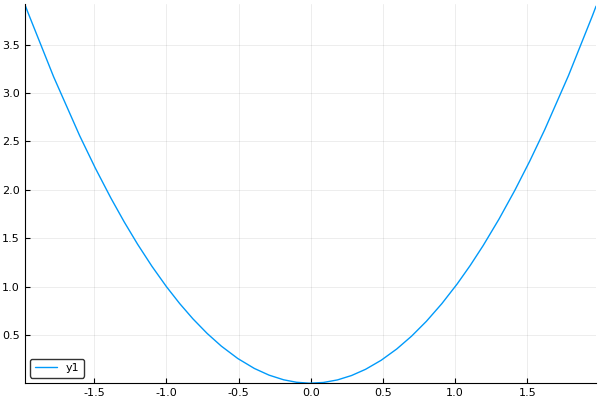

In [9]:
plot(f,-2,2)

Congratualtions: You have reached the goal of this notebook: You now know how to define and plot a function!

However, you might want to tweak your plot a bit if you plan to put it into a paper. So, I will continue and show you some options that might be useful. You might also be interested in how to save the plot to a file (see the end of the notebook).

## Customizing a plot

First, I want to add a fitting label for the function, say "quadratic function". Then I also want to have a label on the x-axis that says "x" and a label on the y-axis saying "y". Furthermore, I think the line should be a big thicker to be well readable in a printout. I will make it twice as thick as the default. This is done as follows:


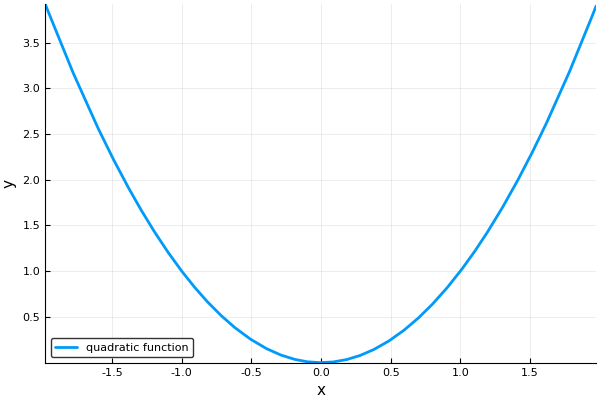

In [14]:
plot(f,-2,2,label="quadratic function",xlabel="x",ylabel="y",linewidth=2)

### Greek letters in our plot labels

Sometimes our variables are not called "x" and "y" but we denote them by Greek letters like $\theta$. We can use these as labels in a plot as well but to do so we have to install and use another package, the package LaTeXStrings.

In [15]:
Pkg.add("LaTeXStrings")

INFO: No packages to install, update or remove
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of LaTeXStrings
INFO: Use `Pkg.update()` to get the latest versions of your packages



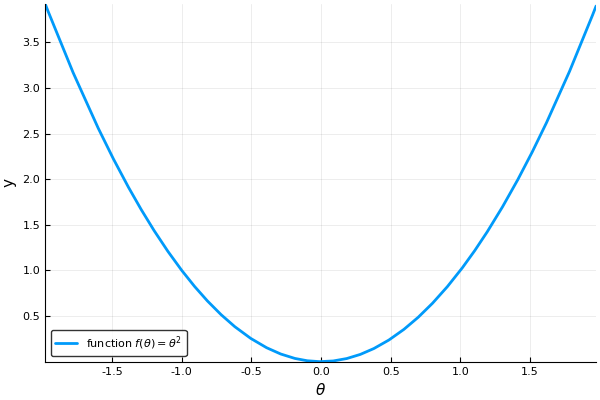

In [20]:
using LaTeXStrings
plot(f,-2,2,label=L"function $f(\theta)=\theta^2$",xlabel=L"$\theta$",ylabel="y",linewidth=2)

The difference is that in the code I put an "L" in front of the label. I can the use LaTeX commands when writing the labels. Note that you have to put such an L in front of everything where you want to use LaTeX (not just the first time or so).

### Dashed lines and colors

In case you do not like the default colors of Plots (e.g. because you want to print in black and white), you can change the colors of your plotlines. You do this using the keyword "linecolor" in the plot command. You follow it with what julia calls a "Symbol". You can recognize symbols as they start with a colon like ":black". There are symbols for the most usual colors, e.g. :green :orange etc.

Sometimes it is useful to use a dashed or dotted line. You can enforce this using the "linestyle" keyword. Again the keyword is assigned a Symbol and you can choose from :solid,:dash,:dot and :dashdot which should be self explanatory.


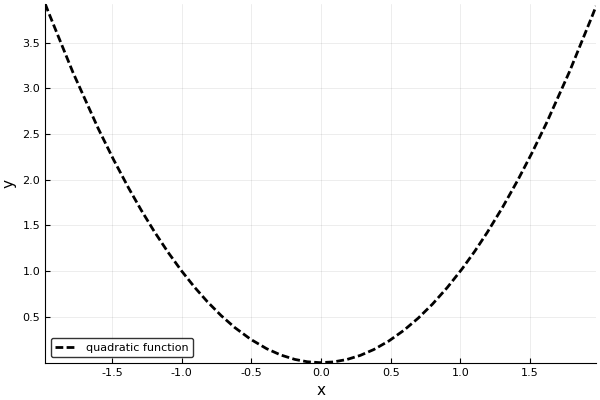

In [31]:
plot(f,-2,2,label="quadratic function",xlabel="x",ylabel="y",linewidth=2,linestyle=:dash,linecolor=:black)

### Remove the grid lines

If you do not like the grid lines that Plots puts into the background, guess what: you can remove them. You use the weyword "grid" and set it equal to "false". That's it!


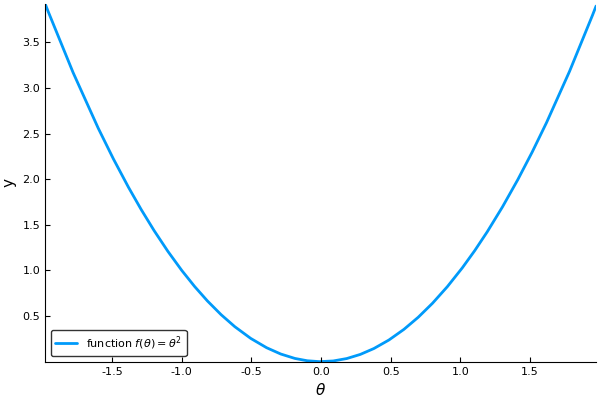

In [36]:
plot(f,-2,2,label=L"function $f(\theta)=\theta^2$",xlabel=L"$\theta$",ylabel="y",linewidth=2,grid=false)

### Several functions in one plot

Next I will define a linear function $h(x)=x$ and plot it together with $f$ in the same plot. To do so, all the functions one might want to plot have to be put in an "Array" (more about Arrays another time) which is a fancy way of saying that you have to put the functions -- separated by commas -- between brackets "[f,h]". The labels for the two functions also have to be put in brackets but you do not have to separate the labels by commas (which I admit is a bit inconsistent).


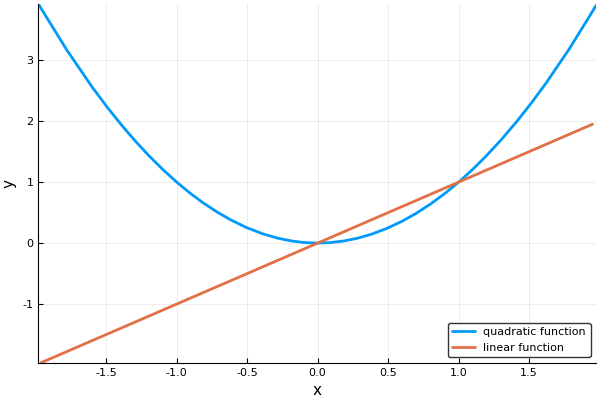

In [24]:
h(x) = x
plot([f, h],-2,2,label=["quadratic function" "linear function"],xlabel="x",ylabel="y",linewidth=2)

Note that Plots automatically adjusted the y axis as some negative values were needed for the linear function. 
Suppose you did not like this (you just want to plot the linear function where it is positive). You can adjust this using the keyword "ylim". More precisely, if you add ylim=(0,4)  to the plots command the y axis goes from 0 to 4. Note that this time you need round brackets.

You can also plot different lines using different styles which is very useful if you have to print in black and white. Here we go with brackets and no commas, i.e. "linestyle=[:solid :dash]".


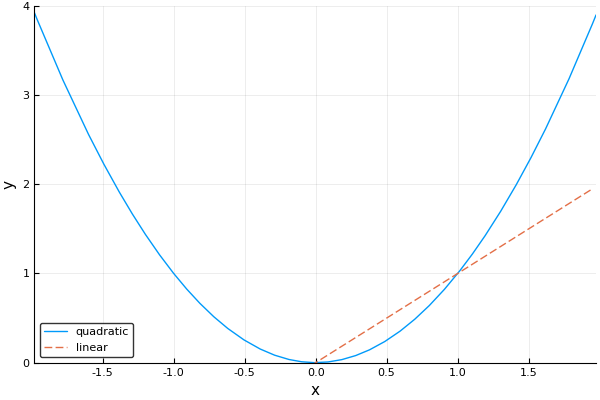

In [33]:
plot([f, h],-2,2,label=["quadratic" "linear"],xlabel="x",ylabel="y",ylim=(0,4),linestyle=[:solid :dash])

### No label

Sometimes there is no need for a lable. You can switch it off by using making the label an empty string: label="" 


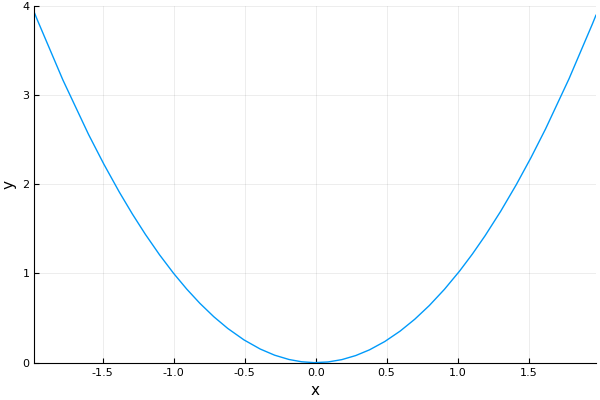

In [34]:
plot(f,-2,2,label="",xlabel="x",ylabel="y",ylim=(0,4))

## Saving the plot to disc

One simple way to save the plot you created is to right click on a plot and use "save image as".
Of course, there is also a command for that: If you execute the command savefig(filename) then the most recent plot will be saved under filename (in the same folder in which the notebook is). The interesting bit about htis command is that you can specify the format under which the figure should saved by the extension in filename, e.g. you can saveit as .pdf or .png or .eps.

In [35]:
savefig("testFigure.pdf")